In [29]:
#Homework 5
#Tianyang Chen
#An Experiment on Synthetic Data
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import copy

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

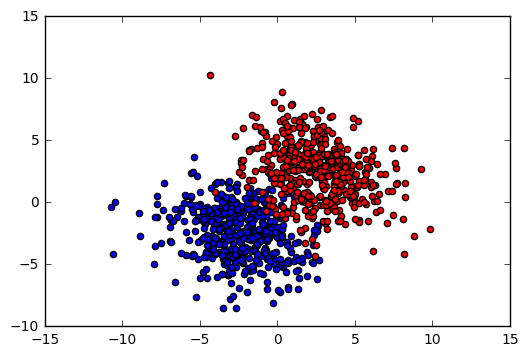

In [30]:
#number of samles in each class
N_train=500 

#generate trainging data
mean = [-2.5, -2.5]
cov = [[5, -1], [-1, 5]]
x, y = np.random.multivariate_normal(mean, cov, N_train).T
mean2 = [2.5, 2.5]
cov2 = [[5, -1], [-1, 5]]
x2, y2 = np.random.multivariate_normal(mean2, cov2, N_train).T
# draw data sets
plt.scatter(x, y, c='b')
plt.scatter(x2, y2, c = 'r')

#rearrange the training data
x = np.row_stack(((np.column_stack((x, y))),(np.column_stack((x2, y2)))))
y = (np.row_stack(((np.zeros((N_train,1))),(np.ones((N_train,1)))))).ravel()

#separate the data samples, 10% are labelled, 90% are unlabelled
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.9, random_state=42)
#separate the data samples, 25% are labelled, 75% are unlabelled
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.75, random_state=42)

#set the probability threshold
threshold=0.9999

In [31]:
# 10% of data samples are labbelled, 90% of data samples are unlabelled
clf = GaussianNB()
clf.fit(x_train, y_train)

# error on testing data, using only the labelled data to train
error_2 = 1 - clf.score(x_test, y_test)
print "Error(using only the labeled): "+str(error_2)

x_test_copy = copy.deepcopy(x_test)
y_test_copy = copy.deepcopy(y_test)

# the self-training rounds
while len(x_test_copy)>0:  
    clf.fit(x_train, y_train)
    index=[]
    cnt=0
    for i in range(len(x_test_copy)):
        if max(max(clf.predict_proba([x_test_copy[i]]))) > threshold:
            cnt+=1
            # add the data with high probability confidence to training data set
            x_train = np.append(x_train,[x_test_copy[i]], axis=0)
            y_train = np.append(y_train,clf.predict([x_test_copy[i]]), axis=0)
            index.append(i)
    x_test_copy = np.delete(x_test_copy, index, axis=0)
    y_test_copy = np.delete(y_test_copy, index, axis=0)
    print "Add "+str(cnt)+" pseudo labels"
    clf.fit(x_train, y_train)
    # error on testing data, using labelled data and some unlabelled data to train
    error_3 = 1 - clf.score(x_test, y_test)
    print "Error("+str(len(x_train))+" samples are used): "+str(error_3)
    # in the self-traing round, if no data could be added to training data set, stop training
    if cnt==0:
        print "self-training is completed"
        break


Error(using only the labeled): 0.0411111111111
Add 116 pseudo labels
Error(216 samples are used): 0.0411111111111
Add 23 pseudo labels
Error(239 samples are used): 0.0422222222222
Add 10 pseudo labels
Error(249 samples are used): 0.0411111111111
Add 7 pseudo labels
Error(256 samples are used): 0.0411111111111
Add 8 pseudo labels
Error(264 samples are used): 0.0422222222222
Add 25 pseudo labels
Error(289 samples are used): 0.0411111111111
Add 35 pseudo labels
Error(324 samples are used): 0.0388888888889
Add 36 pseudo labels
Error(360 samples are used): 0.0411111111111
Add 39 pseudo labels
Error(399 samples are used): 0.0411111111111
Add 26 pseudo labels
Error(425 samples are used): 0.0433333333333
Add 13 pseudo labels
Error(438 samples are used): 0.0433333333333
Add 7 pseudo labels
Error(445 samples are used): 0.0433333333333
Add 1 pseudo labels
Error(446 samples are used): 0.0444444444444
Add 0 pseudo labels
Error(446 samples are used): 0.0444444444444
self-training is completed
